<a href="https://colab.research.google.com/github/fahammed2022/Medicare_Fraud_Detection/blob/main/Medicare%20Fraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Traditional Machine Learning Algorithms

## Load and prepare the data

In [ ]:
# Important libraries for this project

import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data

In [ ]:
# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset = pd.read_csv(dataset_path)

# Display first 5 rows of the dataset
print(Dataset.head())

# Handle Missing Values
Clean_datset = Dataset.dropna( axis = 0)

# Features and Target Variable
Target = Clean_datset.PotentialFraud # Target Column
Features = Clean_datset.drop(['PotentialFraud', 'Provider'], axis=1) # Features Column

# Split Traning data and Test data
Features_Training, Features_Test, Target_Traning, Target_Test = train_test_split(Features, Target, random_state = 0)


   Provider  PotentialFraud  phy_same  phy_count    period  periodadmt  \
0  PRV51001               0  2.960000   1.600000  1.440000    1.000000   
1  PRV51003               1  2.439394   1.530303  3.674242    2.424242   
2  PRV51004               0  2.818792   1.604027  1.429530    0.000000   
3  PRV51005               1  2.731330   1.599142  1.088412    0.000000   
4  PRV51007               0  2.736111   1.527778  0.958333    0.222222   

         age     alife  provider_InscClaimAmtReimbursed_mean  \
0  80.240000  1.000000                           4185.600000   
1  71.371212  0.992424                           4588.409091   
2  73.516779  0.993289                            350.134228   
3  71.783691  0.996567                            241.124463   
4  70.583333  0.986111                            468.194444   

   provider_DeductibleAmtPaid_mean  ...  diag1_OPAnnualReimbursementAmt_mean  \
0                       213.600000  ...                          1811.829279   
1         

## Data Preprocessing

In [ ]:
# Data Preprocessing for faster training
from sklearn import preprocessing
Features_Training = preprocessing.scale(Features_Training)
Features_Test = preprocessing.scale(Features_Test)

## DescisionTree model

In [ ]:
# Create a DescisionTree model
from sklearn.tree import DecisionTreeClassifier # Model Defination for Decesion Tree
from sklearn import metrics # For getting the accuracy of DT model

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(Features_Training, Target_Traning)
dtree_predictions = dtree_model.predict(Features_Test)
print("The DT model accuracy is:",metrics.accuracy_score(dtree_predictions, Target_Test))

The DT model accuracy is: 0.9113082039911308


## SVM model

In [ ]:
# Create a SVM model

from sklearn.svm import SVC # Create a SVM model
SVM_model = SVC(kernel = 'linear', C = 1).fit(Features_Training, Target_Traning)
svm_predictions = SVM_model.predict(Features_Test)

# model accuracy for X_test
svm_accuracy = SVM_model.score(Features_Test, Target_Test)

print("The SVM model accuracy is:",svm_accuracy)

The SVM model accuracy is: 0.9113082039911308


## RF model

In [ ]:
# Create a RF model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 41)
RF.fit(Features_Training, Target_Traning)

# Predicting the Test set results
y_pred = RF.predict(Features_Test)

print("The RF model accuracy is: ", metrics.accuracy_score(Target_Test, y_pred))


The RF model accuracy is:  0.9142645971914265


## KNN model

In [ ]:
# Create a KNN model

from sklearn.neighbors import KNeighborsClassifier
K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors = 4).fit(Features_Training, Target_Traning)

# accuracy on X_test
KNN_accuracy = K_Nearest_Neighbors.score(Features_Test, Target_Test)
print("The KNN model accuracy is:",KNN_accuracy)


The KNN model accuracy is: 0.9105691056910569


# 2.Deep Learning Method

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# #from keras.callbacks import EarlyStopping

# model = Sequential()
# model.add(Dense(54, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

# model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# history = model.fit(Features_Training, Target_Traning, epochs = 100, batch_size = 264, validation_data=(Features_Test, Target_Test))

## Biuld the Neural Network Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Biuld the Neural Network Architecture
model = Sequential()
model.add(Dense(54, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Train Deep Learning Model

In [ ]:
# Train the Model
early_stop = EarlyStopping(patience=15)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(Features_Training, Target_Traning, epochs = 100, batch_size = 300, validation_data=(Features_Test, Target_Test), callbacks=[early_stop])

# Save the model in h5 format
model.save('Deep_learning_model_Default.h5')

# Model Summary
model.summary()

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 0.5808 - accuracy: 0.7193 - val_loss: 0.3622 - val_accuracy: 0.9113
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.9044 - val_loss: 0.2538 - val_accuracy: 0.9113
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2450 - accuracy: 0.9046 - val_loss: 0.2316 - val_accuracy: 0.9113
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2310 - accuracy: 0.9046 - val_loss: 0.2251 - val_accuracy: 0.9106
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2244 - accuracy: 0.9053 - val_loss: 0.2184 - val_accuracy: 0.9135
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2188 - accuracy: 0.9071 - val_loss: 0.2143 - val_accuracy: 0.9150
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2141 - accuracy: 0.9098 - val_loss: 0.2108 - val_accuracy: 0.9150
Epoch 8/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Train-Test Accuracy and Loss curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


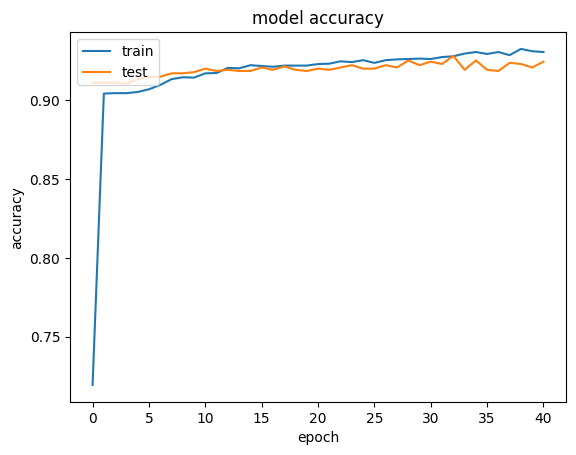

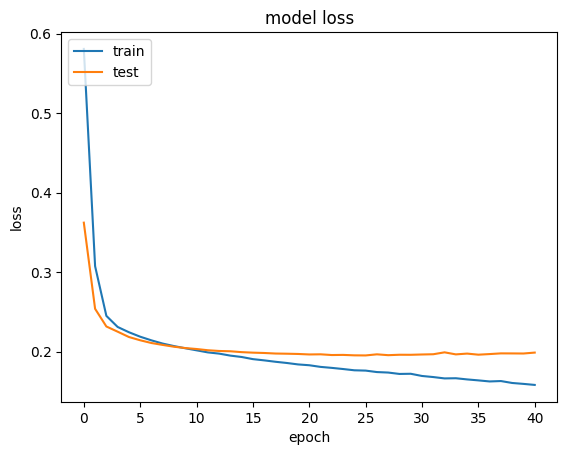

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3.Feature Selection methods


## Feature Selection method by Chi Square

provider_InscClaimAmtReimbursed_std       3.597899e+06
provider_InscClaimAmtReimbursed_mean      1.417072e+06
provider_IPAnnualReimbursementAmt_std     8.876783e+05
provider_IPAnnualReimbursementAmt_mean    7.536195e+05
banel_IPAnnualReimbursementAmt_mean       7.536195e+05
diag1_InscClaimAmtReimbursed_mean         3.991787e+05
diag1_InscClaimAmtReimbursed_std          3.479188e+05
banel_InscClaimAmtReimbursed_mean         2.259264e+05
banel_InscClaimAmtReimbursed_std          2.077559e+05
diag1_IPAnnualReimbursementAmt_mean       1.836456e+05
provider_DeductibleAmtPaid_std            1.691312e+05
provider_DeductibleAmtPaid_mean           1.367157e+05
provider_OPAnnualReimbursementAmt_std     1.173564e+05
banel_IPAnnualDeductibleAmt_mean          6.553807e+04
provider_IPAnnualDeductibleAmt_mean       6.553807e+04
provider_IPAnnualDeductibleAmt_std        6.095169e+04
diag1_DeductibleAmtPaid_mean              4.523939e+04
diag1_IPAnnualReimbursementAmt_std        4.468344e+04
banel_Dedu

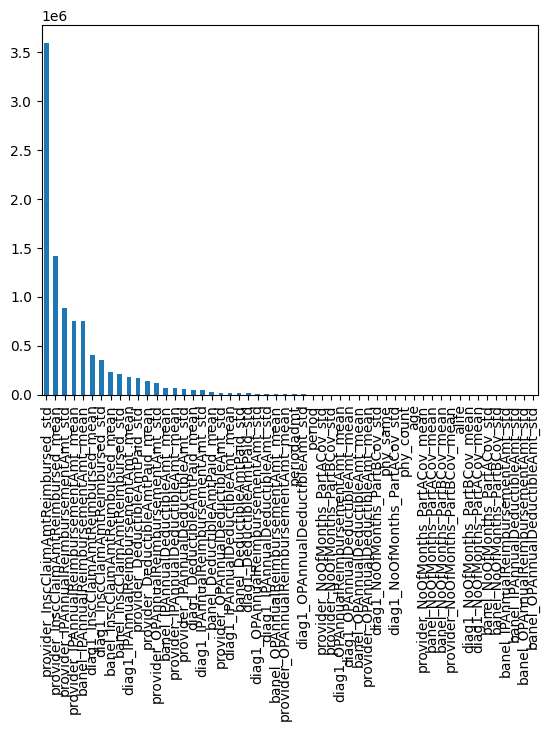

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import matplotlib.pyplot as plt


# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_FS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_FS = Dataset_FS.dropna(axis=0)

# Features and Target Variable
Target_FS = Clean_datset_FS.PotentialFraud
Features_FS = Clean_datset_FS.drop(['PotentialFraud', 'Provider'], axis=1)

# Feature Selection by Chi-Square
chi_scores = chi2(Features_FS, Target_FS)
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=Features_FS.columns)
chi_values.sort_values(ascending=False, inplace=True)
print(chi_values)
chi_values.plot.bar()


# Select the top k features (you can change k as needed)
k = 25
best_features = SelectKBest(score_func=chi2, k=k)
Features_new = best_features.fit_transform(Features_FS, Target_FS)

scaler = StandardScaler()
featuresstand=scaler.fit_transform(Features_new)

# Split the dataset into train and test sets
Feature_Train_FS, Feature_Test_FS, Target_Train_FS, Target_Test_FS = train_test_split(Features_new, Target_FS, random_state=42)


## Feature Selection method by Mutual Info

phy_same                                  0.024503
diag1_NoOfMonths_PartACov_mean            0.024503
banel_OPAnnualDeductibleAmt_mean          0.024503
banel_InscClaimAmtReimbursed_std          0.024503
banel_DeductibleAmtPaid_std               0.024503
banel_NoOfMonths_PartACov_std             0.024503
banel_NoOfMonths_PartBCov_std             0.024503
banel_IPAnnualReimbursementAmt_std        0.024503
banel_IPAnnualDeductibleAmt_std           0.024503
banel_OPAnnualReimbursementAmt_std        0.024503
banel_OPAnnualDeductibleAmt_std           0.024503
diag1_InscClaimAmtReimbursed_mean         0.024503
diag1_DeductibleAmtPaid_mean              0.024503
diag1_NoOfMonths_PartBCov_mean            0.024503
phy_count                                 0.024503
diag1_IPAnnualReimbursementAmt_mean       0.024503
diag1_IPAnnualDeductibleAmt_mean          0.024503
diag1_OPAnnualReimbursementAmt_mean       0.024503
diag1_OPAnnualDeductibleAmt_mean          0.024503
diag1_InscClaimAmtReimbursed_st

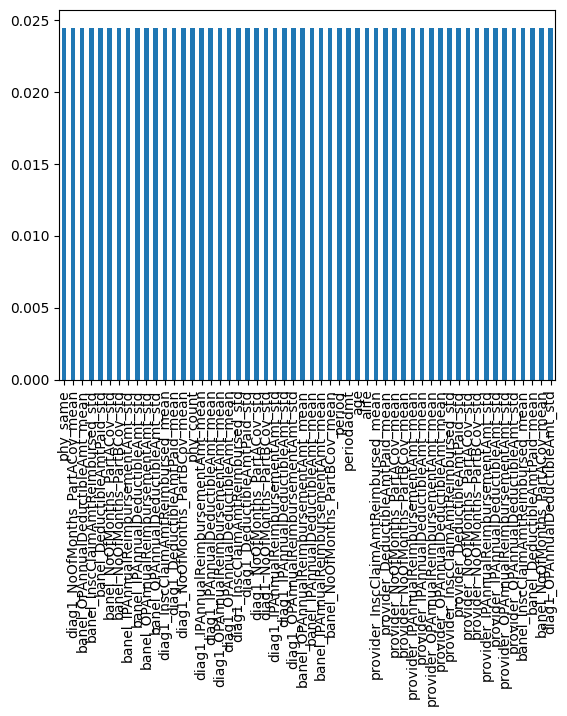

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_FS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_FS = Dataset_FS.dropna(axis=0)

# Features and Target Variable
Target_FS = Clean_datset_FS.PotentialFraud
Features_FS = Clean_datset_FS.drop(['PotentialFraud', 'Provider'], axis=1)

# Feature Selection by Mutual info
mutual_info_scores = mutual_info_classif(Features_FS, Target_FS)
# higher the chi value, higher the importance
mutual_info_values = pd.Series(mutual_info_scores[0], index=Features_FS.columns)
mutual_info_values.sort_values(ascending=False, inplace=True)
print(mutual_info_values)
mutual_info_values.plot.bar()


# Select the top k features (you can change k as needed)
k = 30
best_features = SelectKBest(score_func=mutual_info_classif, k=k)
Features_new = best_features.fit_transform(Features_FS, Target_FS)

scaler = StandardScaler()
featuresstand=scaler.fit_transform(Features_new)

# Split the dataset into train and test sets
Feature_Train_FS, Feature_Test_FS, Target_Train_FS, Target_Test_FS = train_test_split(Features_new, Target_FS, random_state=42)


## Neurla Network Model for this Experiment

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Biuld the Neural Network Architecture
model = Sequential()
model.add(Dense(54, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Train the Model
early_stop = EarlyStopping(patience=15)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(Feature_Train_FS, Target_Train_FS, epochs = 350, batch_size = 32, validation_data=(Feature_Test_FS, Target_Test_FS), callbacks=[early_stop])

# Model Summary
model.summary()

Epoch 1/350
127/127 [==============================] - 2s 5ms/step - loss: 98.7128 - accuracy: 0.8536 - val_loss: 12.8371 - val_accuracy: 0.8529
Epoch 2/350
127/127 [==============================] - 0s 4ms/step - loss: 15.0197 - accuracy: 0.8691 - val_loss: 18.0519 - val_accuracy: 0.8995
Epoch 3/350
127/127 [==============================] - 0s 4ms/step - loss: 10.9103 - accuracy: 0.8755 - val_loss: 11.3752 - val_accuracy: 0.8921
Epoch 4/350
127/127 [==============================] - 1s 5ms/step - loss: 8.3623 - accuracy: 0.8772 - val_loss: 10.9884 - val_accuracy: 0.8108
Epoch 5/350
127/127 [==============================] - 1s 4ms/step - loss: 8.4487 - accuracy: 0.8699 - val_loss: 9.1475 - val_accuracy: 0.8078
Epoch 6/350
127/127 [==============================] - 1s 4ms/step - loss: 9.8043 - accuracy: 0.8610 - val_loss: 12.5668 - val_accuracy: 0.8359
Epoch 7/350
127/127 [==============================] - 1s 5ms/step - loss: 9.4090 - accuracy: 0.8733 - val_loss: 6.3291 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


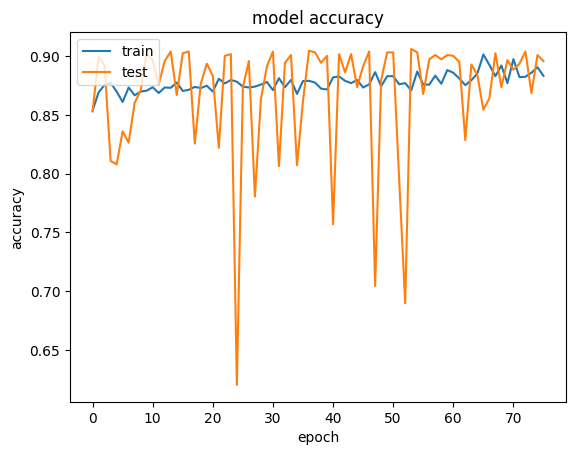

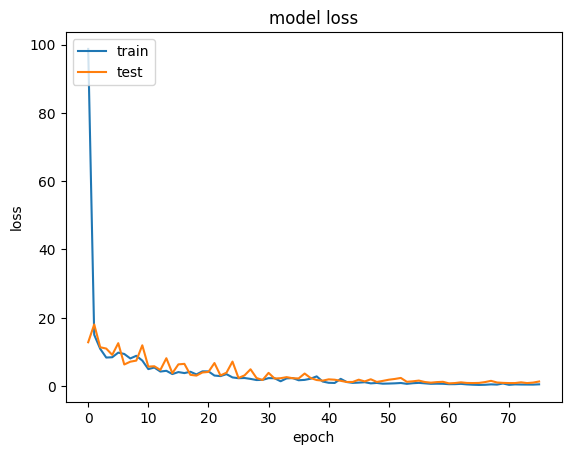

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4.Data Sampling in Deep Learning model

## Random Over Sampling

8336
8336


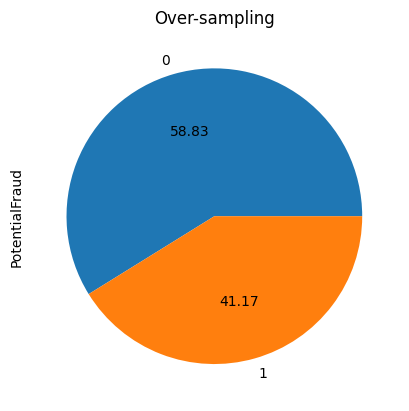

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from imblearn.over_sampling import RandomOverSampler # add sample data randomly for minority class
from keras.callbacks import EarlyStopping

# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_DS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_DS = Dataset_DS.dropna(axis=0)

# Features and Target Variable
Target_DS = Clean_datset_DS.PotentialFraud
Features_DS = Clean_datset_DS.drop(['PotentialFraud', 'Provider'], axis=1)

#Target_DS.value_counts().plot.pie(autopct='%.2f')

ros = RandomOverSampler(sampling_strategy=0.7) # Numerical value#
#rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = ros.fit_resample(Features_DS, Target_DS)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

scaler = StandardScaler()
featuresstand=scaler.fit_transform(X_res)

# Split the dataset into train and test sets
Feature_Train_DS, Feature_Test_DS, Target_Train_DS, Target_Test_DS = train_test_split(featuresstand, y_res, random_state=42)


## Random Under Sampling

4722


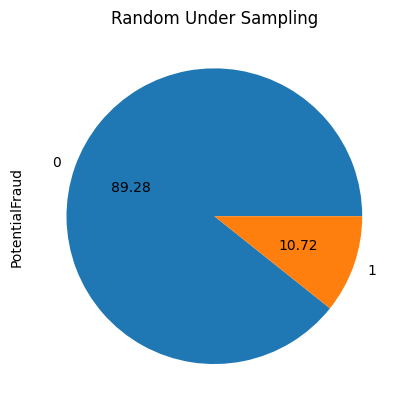

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from imblearn.under_sampling import RandomUnderSampler # Remove sample data randomly for majority class
from keras.callbacks import EarlyStopping

# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_DS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_DS = Dataset_DS.dropna(axis=0)

# Features and Target Variable
Target_DS = Clean_datset_DS.PotentialFraud
Features_DS = Clean_datset_DS.drop(['PotentialFraud', 'Provider'], axis=1)

#Target_DS.value_counts().plot.pie(autopct='%.2f')

rus = RandomUnderSampler(sampling_strategy=0.12) # Numerical value#
#rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(Features_DS, Target_DS)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Under Sampling")

scaler = StandardScaler()
featuresstand=scaler.fit_transform(X_res)
print(len(X_res))
# Split the dataset into train and test sets
Feature_Train_DS, Feature_Test_DS, Target_Train_DS, Target_Test_DS = train_test_split(featuresstand, y_res, random_state=42)


## SMOTE

9808


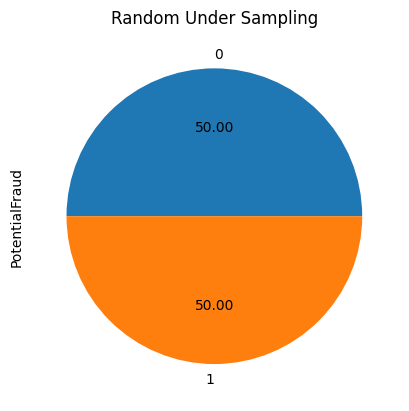

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from imblearn.over_sampling import SMOTE # Generates synthetic samples for the minority class
from keras.callbacks import EarlyStopping

# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_DS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_DS = Dataset_DS.dropna(axis=0)

# Features and Target Variable
Target_DS = Clean_datset_DS.PotentialFraud
Features_DS = Clean_datset_DS.drop(['PotentialFraud', 'Provider'], axis=1)

#Target_DS.value_counts().plot.pie(autopct='%.2f')

Smote = SMOTE(sampling_strategy='auto', random_state=42)

X_res, y_res = Smote.fit_resample(Features_DS, Target_DS)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Random Under Sampling")

scaler = StandardScaler()
featuresstand=scaler.fit_transform(X_res)
print(len(X_res))
# Split the dataset into train and test sets
Feature_Train_DS, Feature_Test_DS, Target_Train_DS, Target_Test_DS = train_test_split(featuresstand, y_res, random_state=42)


## Neural Network Model for this experiemnt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.callbacks import EarlyStopping

# Biuld the Neural Network Architecture
model = Sequential()
model.add(Dense(54, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Train the Model
# early_stop = EarlyStopping(patience=15)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(Feature_Train_DS, Target_Train_DS, epochs = 100, batch_size = 100, validation_data=(Feature_Test_DS, Target_Test_DS))

# Model Summary
model.summary()

Epoch 1/100
74/74 [==============================] - 2s 9ms/step - loss: 0.5079 - accuracy: 0.7378 - val_loss: 0.4028 - val_accuracy: 0.8308
Epoch 2/100
74/74 [==============================] - 0s 6ms/step - loss: 0.3507 - accuracy: 0.8592 - val_loss: 0.3257 - val_accuracy: 0.8699
Epoch 3/100
74/74 [==============================] - 1s 7ms/step - loss: 0.3044 - accuracy: 0.8802 - val_loss: 0.2926 - val_accuracy: 0.8870
Epoch 4/100
74/74 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.8910 - val_loss: 0.2840 - val_accuracy: 0.8887
Epoch 5/100
74/74 [==============================] - 2s 22ms/step - loss: 0.2648 - accuracy: 0.9008 - val_loss: 0.2648 - val_accuracy: 0.8993
Epoch 6/100
74/74 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.9035 - val_loss: 0.2554 - val_accuracy: 0.9025
Epoch 7/100
74/74 [==============================] - 0s 5ms/step - loss: 0.2397 - accuracy: 0.9092 - val_loss: 0.2453 - val_accuracy: 0.9025
Epoch 8/100


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


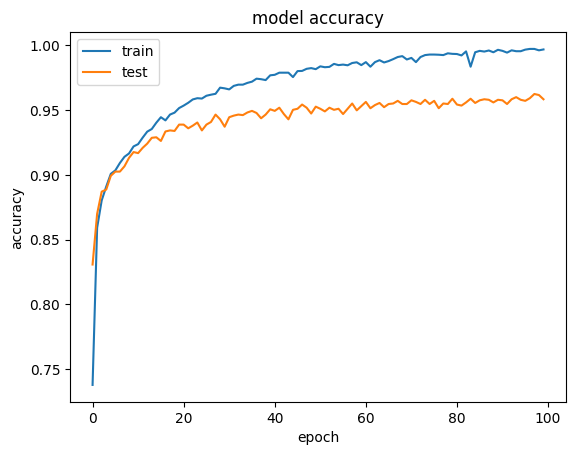

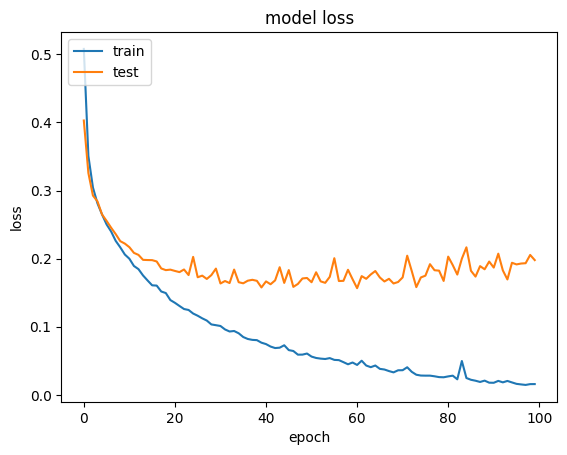

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 5.Feature Selection and Data Sampling Together

9808


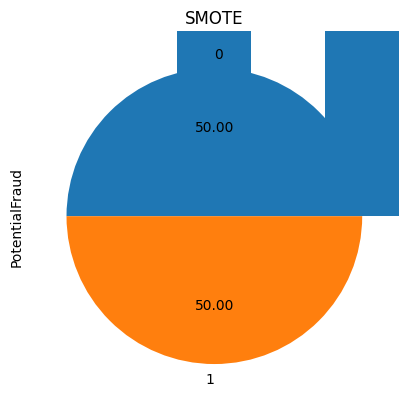

In [ ]:
import pandas as pd  # To read the dataset from CSV file
from sklearn.preprocessing import StandardScaler  # Using for Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the dataset into training and test sets
import numpy as np  # Accessing data
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import matplotlib.pyplot as plt


# Read the dataset
dataset_path = "/content/sample_data/FahadUpdated2.csv"
Dataset_FS = pd.read_csv(dataset_path)

# Handle Missing Values
Clean_datset_FS = Dataset_FS.dropna(axis=0)

# Features and Target Variable
Target_FS = Clean_datset_FS.PotentialFraud
Features_FS = Clean_datset_FS.drop(['PotentialFraud', 'Provider'], axis=1)

# Feature Selection by Chi-Square
chi_scores = chi2(Features_FS, Target_FS)
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=Features_FS.columns)
chi_values.sort_values(ascending=False, inplace=True)
# print(chi_values)
chi_values.plot.bar()

# Select the top k features (you can change k as needed)
k = 25
best_features = SelectKBest(score_func=chi2, k=k)
Features_new = best_features.fit_transform(Features_FS, Target_FS)


Smote = SMOTE(sampling_strategy='auto', random_state=42)

X_res, y_res = Smote.fit_resample(Features_new, Target_FS)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("SMOTE")

scaler = StandardScaler()
featuresstand=scaler.fit_transform(X_res)

print(len(featuresstand))

# Split the dataset into train and test sets
Feature_Train_FS, Feature_Test_FS, Target_Train_FS, Target_Test_FS = train_test_split(featuresstand, y_res, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.callbacks import EarlyStopping

# Biuld the Neural Network Architecture
model = Sequential()
model.add(Dense(54, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Train the Model
# early_stop = EarlyStopping(patience=15)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(Feature_Train_FS, Target_Train_FS, epochs = 500, batch_size = 100, validation_data=(Feature_Test_FS, Target_Test_FS))

# Model Summary
model.summary()

Epoch 1/500
74/74 [==============================] - 2s 9ms/step - loss: 0.5044 - accuracy: 0.7539 - val_loss: 0.4187 - val_accuracy: 0.8091
Epoch 2/500
74/74 [==============================] - 1s 12ms/step - loss: 0.3970 - accuracy: 0.8201 - val_loss: 0.3744 - val_accuracy: 0.8352
Epoch 3/500
74/74 [==============================] - 0s 5ms/step - loss: 0.3729 - accuracy: 0.8393 - val_loss: 0.3588 - val_accuracy: 0.8418
Epoch 4/500
74/74 [==============================] - 0s 3ms/step - loss: 0.3599 - accuracy: 0.8515 - val_loss: 0.3472 - val_accuracy: 0.8520
Epoch 5/500
74/74 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.8590 - val_loss: 0.3390 - val_accuracy: 0.8585
Epoch 6/500
74/74 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8611 - val_loss: 0.3252 - val_accuracy: 0.8666
Epoch 7/500
74/74 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8642 - val_loss: 0.3222 - val_accuracy: 0.8662
Epoch 8/500


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


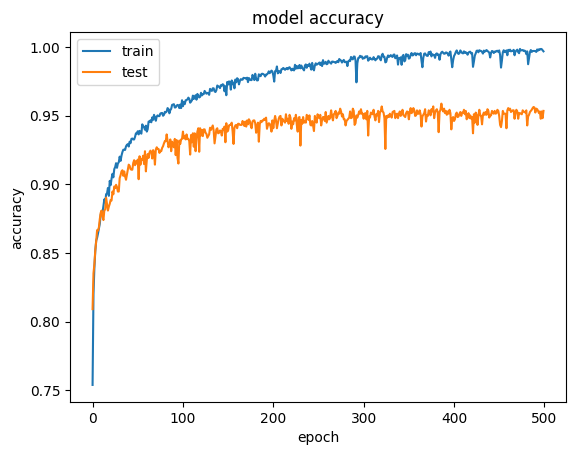

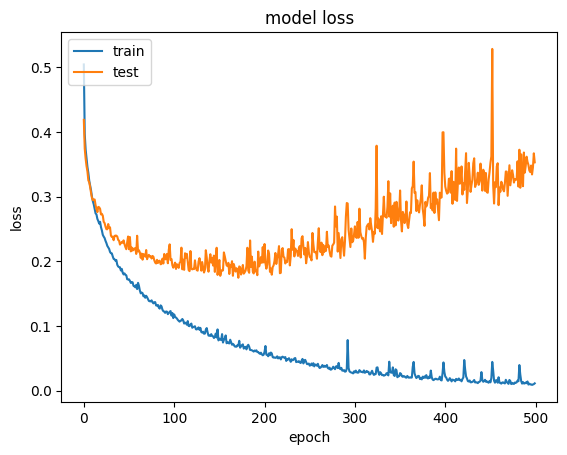

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()